In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from IPython.display import display, HTML

# Download data

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = #Enter your kaggle API username
os.environ['KAGGLE_KEY'] = #Enter your kaggle API key
!kaggle competitions download -c sberbank-russian-housing-market

  0% 0.00/66.5k [00:00<?, ?B/s]
100% 66.5k/66.5k [00:00<00:00, 59.8MB/s]
  0% 0.00/18.6k [00:00<?, ?B/s]
100% 18.6k/18.6k [00:00<00:00, 39.3MB/s]
100% 4.46M/4.46M [00:00<00:00, 20.5MB/s]

 53% 9.00M/17.1M [00:00<00:00, 16.1MB/s]
100% 17.1M/17.1M [00:00<00:00, 26.9MB/s]
  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 21.6MB/s]


In [3]:
!rm -r sample_data
!unzip -o train.csv.zip
!rm train.csv.zip
!unzip -o macro.csv.zip
!rm macro.csv.zip
!unzip -o sample_submission.csv.zip
!rm sample_submission.csv.zip
!unzip -o test.csv.zip
!rm test.csv.zip
!rm -r __MACOSX

Archive:  train.csv.zip
  inflating: train.csv               
   creating: __MACOSX/
  inflating: __MACOSX/._train.csv    
Archive:  macro.csv.zip
  inflating: macro.csv               
Archive:  sample_submission.csv.zip
  inflating: sample_submission.csv   
Archive:  test.csv.zip
  inflating: test.csv                
  inflating: __MACOSX/._test.csv     


# Train data analysis

In [0]:
train = pd.read_csv('./train.csv', index_col='id')
test = pd.read_csv('./test.csv', index_col='id')

In [0]:
train['timestamp'] = train['timestamp'].apply(pd.to_datetime)

In [6]:
nan_info = train.isna().sum()
nan_info[nan_info > 0]

life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
preschool_quota                           6688
school_quota                              6685
hospital_beds_raion                      14441
raion_build_count_with_material_info      4991
build_count_block                         4991
build_count_wood                          4991
build_count_frame                         4991
build_count_brick                         4991
build_count_monolith                      4991
build_count_panel                         4991
build_count_foam                          4991
build_count_slag                          4991
build_count_mix                           4991
raion_build_c

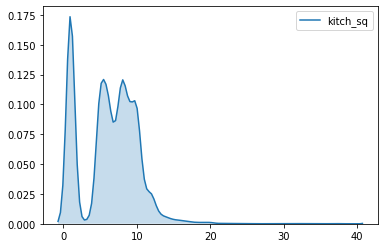

In [7]:
kitch_sq = train['kitch_sq']
kitch_sq = kitch_sq.where(kitch_sq.notnull(), 0)
kitch_sq = kitch_sq[kitch_sq > 0]
kitch_sq = kitch_sq[kitch_sq < 40]
sns.kdeplot(data=kitch_sq, shade=True)

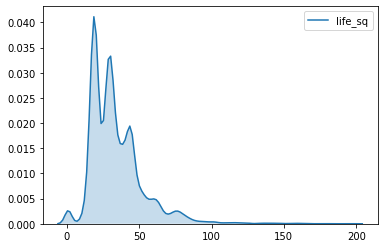

In [8]:
life_sq = train['life_sq']
life_sq = life_sq.where(life_sq.notnull(), 0)
life_sq = life_sq[life_sq > 0]
life_sq = life_sq[life_sq < 200]
sns.kdeplot(data=life_sq, shade=True)

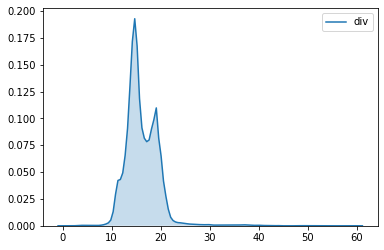

In [9]:
life_room_sq = train[['life_sq', 'num_room', 'build_year']]
life_room_sq = life_room_sq.where(life_room_sq.notnull().all(axis=1), 0)
life_room_sq = life_room_sq[(life_room_sq.life_sq > 0) & (life_room_sq.life_sq < 200) & (life_room_sq.num_room > 0)
                           & (life_room_sq.build_year > 1950) & (life_room_sq.build_year < 2011)]
life_room_sq['div'] = life_room_sq.life_sq / life_room_sq.num_room
life_room_sq = life_room_sq[life_room_sq['div'] < 60]
sns.kdeplot(data=life_room_sq['div'], shade=True)

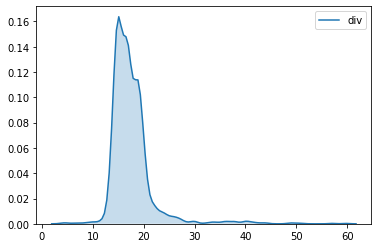

In [10]:
life_room_sq = train[['life_sq', 'num_room', 'build_year']]
life_room_sq = life_room_sq.where(life_room_sq.notnull().all(axis=1), 0)
life_room_sq = life_room_sq[(life_room_sq.life_sq > 0) & (life_room_sq.life_sq < 200) & (life_room_sq.num_room > 0)
                           & (life_room_sq.build_year > 2000) & (life_room_sq.build_year < 2011)]
life_room_sq['div'] = life_room_sq.life_sq / life_room_sq.num_room
life_room_sq = life_room_sq[life_room_sq['div'] < 60]
sns.kdeplot(data=life_room_sq['div'], shade=True)

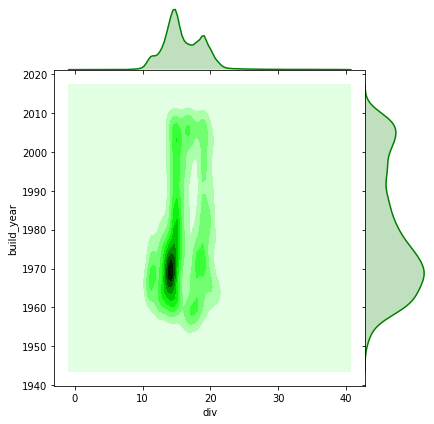

In [11]:
life_room_sq = train[['life_sq', 'num_room', 'build_year']]
life_room_sq = life_room_sq.where(life_room_sq.notnull().all(axis=1), 0)
life_room_sq = life_room_sq[(life_room_sq.life_sq > 0) & (life_room_sq.life_sq < 200) & (life_room_sq.num_room > 0)
                           & (life_room_sq.build_year > 1950) & (life_room_sq.build_year < 2011)]
life_room_sq['div'] = life_room_sq.life_sq / life_room_sq.num_room
life_room_sq = life_room_sq[(life_room_sq['div'] < 40) & (life_room_sq['build_year'] < 2011)]
sns.jointplot('div', 'build_year', data=life_room_sq, kind="kde", space=0, color="g")

In [0]:
data = train[['max_floor', 'build_year']]
data=data[data.notnull().all(axis=1)]
data = data[(data.max_floor < 50) & (data.build_year < 2011) & (data.build_year > 1900)]

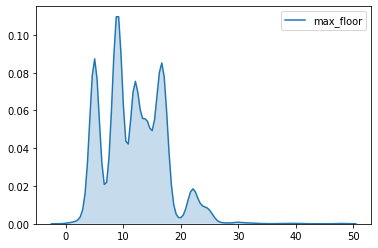

In [13]:
sns.kdeplot(data=data.max_floor, shade=True)

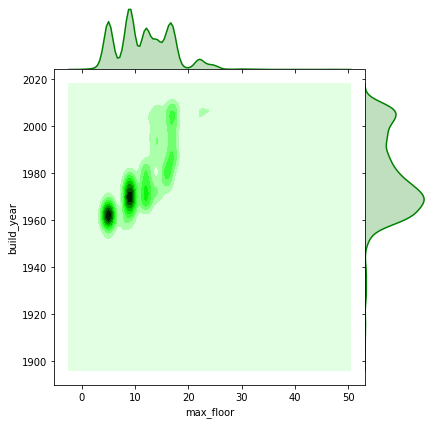

In [14]:
sns.jointplot('max_floor', 'build_year', data=data, kind="kde", space=0, color="g")

In [0]:
data = train[['num_room', 'build_year']]
data=data[data.notnull().all(axis=1)]
data = data[(data.num_room < 10) & (data.build_year < 2011) & (data.build_year > 1900)]

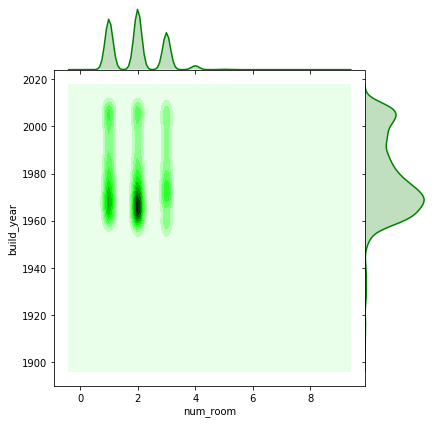

In [16]:
sns.jointplot('num_room', 'build_year', data=data, kind="kde", space=0, color="g")

# Refacturing data & NAN filling

We will work with testing data which was dropped out during refacturing individually

In [17]:
train.describe().iloc[:, :9]

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000
50%,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000


In [0]:
def num_houses_with_bigger_column_value (column_name, value):
    data = train.apply(lambda x: True if x[column_name] > value else False, axis = 1)
    return len(data[data])

In [0]:
def num_houses_with_less_column_value (column_name, value):
    data = train.apply(lambda x: True if x[column_name] < value else False, axis = 1)
    return len(data[data])

## &emsp; full_sq

In [20]:
train['full_sq'].describe()

count    30471.000000
mean        54.214269
std         38.031487
min          0.000000
25%         38.000000
50%         49.000000
75%         63.000000
max       5326.000000
Name: full_sq, dtype: float64

In [21]:
'Number of houses with full square = 0, equals ' + str(len(train[train.full_sq == 0]))

'Number of houses with full square = 0, equals 2'

In [22]:
for value in [10, 20, 30, 40, 50, 100, 150, 200, 250, 375, 500]:
    print(str(num_houses_with_bigger_column_value('full_sq', value)) + 
          ' houses have bigger full square than ' + str(value) + '.')

30441 houses have bigger full square than 10.
30307 houses have bigger full square than 20.
29362 houses have bigger full square than 30.
20877 houses have bigger full square than 40.
14840 houses have bigger full square than 50.
961 houses have bigger full square than 100.
170 houses have bigger full square than 150.
36 houses have bigger full square than 200.
16 houses have bigger full square than 250.
11 houses have bigger full square than 375.
6 houses have bigger full square than 500.


In [23]:
train[train['full_sq'] > 250]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
129,2011-10-15,325,325.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Ivanovskoe,1.020722e+07,122862,0.512707,0.000170,6027,2697.0,7,5992,9439.0,8,1,NaN,1,0,5,0,no,0,1,0,no,no,no,yes,no,no,no,no,...,629.27,1085.37,857.32,1,11,19,9,1,1,0,5,7,0,6,19,3,26.67,5.24,11,336274,20,614676,87,604.76,1041.67,823.21,3,26,36,18,3,1,0,7,14,0,9,44,10,5000000
1310,2012-02-24,291,189.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Kurkino,7.792845e+06,21155,0.528252,0.000000,2539,2794.0,4,2733,6620.0,4,0,920.0,0,0,7,1,no,0,4,0,no,no,no,no,no,no,no,no,...,1005.26,1605.26,1305.26,0,2,3,10,3,1,0,1,2,0,0,7,0,14.06,1.06,3,53940,12,461830,41,880.49,1439.02,1159.76,0,7,10,16,7,1,0,1,3,0,0,10,2,7750000
1481,2012-03-11,353,20.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Solncevo,1.132409e+07,113897,0.083810,0.371149,8340,3953.0,5,7065,9700.0,5,0,750.0,2,0,4,3,no,0,5,1,no,no,no,no,no,no,no,no,...,600.00,1035.71,817.86,3,3,7,4,0,0,0,1,5,0,1,11,2,27.32,9.83,7,305709,10,331350,29,916.00,1540.00,1228.00,4,3,10,6,4,2,0,3,9,0,1,14,2,4750000
1613,2012-03-21,394,17.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Ljublino,1.788191e+07,165727,0.260653,0.133215,10809,5153.0,10,11395,11887.0,13,0,1406.0,3,0,13,1,no,0,4,3,no,no,no,yes,no,yes,no,yes,...,673.47,1132.65,903.06,3,15,17,13,3,1,0,6,10,0,1,24,5,26.06,10.50,6,79623,35,1483860,107,629.17,1067.71,848.44,11,33,34,22,6,1,0,8,23,0,3,55,9,1050000
2428,2012-06-07,412,17.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Filevskij Park,9.629358e+06,89467,0.343754,0.238617,3903,1522.0,5,3889,4904.0,5,0,705.0,3,0,18,1,no,0,6,6,no,no,no,yes,no,no,no,no,...,1071.43,1769.23,1420.33,7,15,26,19,18,12,1,4,12,1,4,34,0,18.52,9.90,107,4066276,31,1531229,398,1031.49,1693.37,1362.43,36,73,87,87,74,36,5,14,34,1,6,92,5,6117000
2783,2012-07-06,729,44.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Troparevo-Nikulino,1.127507e+07,112804,0.331076,0.000991,6945,3587.0,8,6783,11286.0,9,2,NaN,1,1,14,2,no,0,9,3,no,no,no,yes,no,no,no,no,...,678.87,1147.89,913.38,6,24,22,15,10,0,0,3,10,0,2,27,1,23.36,10.07,31,750760,32,728050,215,782.67,1304.46,1043.56,13,52,63,54,27,5,1,5,24,1,4,63,6,13250000
3530,2012-09-07,5326,22.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Birjulevo Vostochnoe,1.479557e+07,145088,0.308057,0.050900,9223,4519.0,6,10621,10053.0,6,0,30.0,2,0,8,3,no,0,3,1,no,no,no,yes,no,no,no,no,...,758.82,1294.12,1026.47,2,3,7,4,3,0,0,3,7,0,2,13,3,14.17,16

Some houses have suspiciously low full_sq / life_sq ratio, will drop them out later: after filling in all life_sq & kitch_sq.

In [24]:
train[train['full_sq'] < 1]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17935,2014-04-28,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,OwnerOccupier,Poselenie Voskresenskoe,21494094.80,7122,0.262459,0.017647,489,NaN,0,469,NaN,0,0,NaN,0,0,0,2,no,0,0,0,no,no,no,no,no,no,no,no,...,1000.0,1500.00,1250.00,0,0,0,3,0,0,0,1,3,1,0,5,0,17.92,4.75,0,0,5,262000,18,700.00,1125.00,912.50,2,4,4,8,0,0,0,1,7,1,0,12,1,4425000
24299,2014-11-05,0,77.0,4.0,17.0,1.0,0.0,3.0,0.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,25536296.81,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,no,...,700.0,1222.22,961.11,0,1,5,2,1,0,0,1,3,0,0,6,0,34.95,6.16,1,117300,4,201300,20,747.37,1263.16,1005.26,1,4,8,5,1,1,0,2,12,0,1,10,0,8167508


In [0]:
train.loc[24299, 'full_sq'] = train.loc[24299, 'life_sq']

In [26]:
train[train['full_sq'] < train['life_sq']]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1085,2012-02-06,44.0,281.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,6200000
1189,2012-02-14,9.0,44.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Veshnjaki,1.051837e+07,118945,0.334905,0.012339,5208,3494.0,6,5776,6766.0,7,0,2078.0,2,0,7,0,no,0,4,1,no,no,no,no,no,no,no,no,...,655.56,1074.07,864.81,0,9,7,10,1,0,0,3,9,0,4,20,5,21.94,5.56,6,226450,30,452982,102,680.00,1150.00,915.00,2,30,37,24,6,3,0,9,18,0,10,53,9,6300000
1825,2012-04-09,18.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Ljublino,1.788191e+07,165727,0.260653,0.133215,10809,5153.0,10,11395,11887.0,13,0,1406.0,3,0,13,1,no,0,4,3,no,no,no,yes,no,yes,no,yes,...,667.39,1130.43,898.91,3,14,17,11,3,1,0,5,8,0,0,22,1,26.28,9.05,7,106573,36,1484860,105,625.26,1063.16,844.21,10,33,34,21,6,1,0,8,23,0,3,55,9,5200000
1866,2012-04-11,30.0,178.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Presnenskoe,1.163805e+07,123280,0.068202,0.042032,7125,3240.0,7,6856,10602.0,9,0,1940.0,2,1,29,2,yes,3,5,84,no,no,no,yes,no,no,no,no,...,1044.11,1702.74,1373.42,28,82,82,91,64,37,9,13,15,0,7,47,3,11.60,11.82,421,7947937,56,2623000,1498,922.93,1518.57,1220.75,98,352,360,347,223,98,20,48,91,1,68,155,7,5900000
2012,2012-04-25,5.0,40.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Gol'janovo,1.428699e+07,157010,0.389354,0.194489,7751,5041.0,6,8004,11081.0,7,0,125.0,3,0,5,3,no,0,5,3,no,no,no,yes,no,no,no,no,...,724.00,1220.00,972.00,4,14,18,12,4,2,0,4,8,0,1,32,5,41.28,9.82,20,398612,20,719166,103,641.24,1087.63,864.43,6,34,34,21,6,2,0,10,14,0,2,50,5,5770000
4388,2012-10-25,73.0,426.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Vojkovskoe,5.333221e+06,64931,0.074077,0.169091,3905,1579.0,6,3856,5838.0,8,0,NaN,2,0,5,2,no,0,5,10,no,no,no,no,no,no,no,yes,...,635.24,1071.43,853.33,13,39,34,24,6,2,0,4,7,0,0,29,5,15.32,13.63,82,2038109,45,1388959,304,682.55,1145.45,914.00,29,89,91,70,17,8,0,14,25,0,3,88,14,11918400
6339,2013-03-06,37.0,191.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Kosino-Uhtomskoe,1.488362e+07,72131,0.024444,0.158249,7567,3848.0,4,5731,8687.0,5,0,NaN,1,0,4,2,no,0,0,0,no,yes,no,yes,no,no,no,no,...,785.71,1285.71,1035.71,0,0,3,4,

A really strange set of houses, I can't imagine how we can edit the full_sq column to make these flats look any reasonable, except from using full_sq / life_sq ratio.

In [0]:
train = train.drop(train[train['full_sq'] < 1].index)

## &emsp; life_sq

In [28]:
train['life_sq'].describe()

count    24087.000000
mean        34.404700
std         52.286349
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [29]:
'Number of houses with life square = 0, equals ' + str(len(train[train.life_sq == 0]))

'Number of houses with life square = 0, equals 44'

In [30]:
train[train.life_sq == 0]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
859,2012-01-19,78.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nekrasovka,1.139168e+07,19940,0.055644,0.243205,1706,2395.0,5,1564,7377.0,5,0,540.0,0,0,0,4,no,0,0,0,no,yes,no,no,no,no,no,no,...,833.33,1333.33,1083.33,0,0,1,2,0,0,0,0,2,0,0,1,1,14.72,7.89,0,0,5,54937,17,741.18,1235.29,988.24,0,2,7,7,1,0,0,5,6,0,0,11,2,552312
1599,2012-03-20,59.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nekrasovka,1.139168e+07,19940,0.055644,0.243205,1706,2395.0,5,1564,7377.0,5,0,540.0,0,0,0,4,no,0,0,0,no,yes,no,no,no,no,no,no,...,833.33,1333.33,1083.33,0,0,1,2,0,0,0,0,2,0,0,1,1,14.04,7.89,0,0,5,54937,15,753.33,1266.67,1010.00,0,1,7,6,1,0,0,4,6,0,0,7,1,338570
2781,2012-07-06,38.0,0.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nekrasovka,1.139168e+07,19940,0.055644,0.243205,1706,2395.0,5,1564,7377.0,5,0,540.0,0,0,0,4,no,0,0,0,no,yes,no,no,no,no,no,no,...,633.33,1083.33,858.33,0,1,3,2,0,0,0,1,2,0,0,1,1,14.00,7.89,1,26950,5,54937,21,661.90,1142.86,902.38,0,3,11,6,1,0,0,4,6,0,0,10,1,675205
3429,2012-08-31,71.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nekrasovka,1.139168e+07,19940,0.055644,0.243205,1706,2395.0,5,1564,7377.0,5,0,540.0,0,0,0,4,no,0,0,0,no,yes,no,no,no,no,no,no,...,633.33,1083.33,858.33,0,1,3,2,0,0,0,1,2,0,0,1,1,13.85,7.89,1,26950,5,54937,21,661.90,1142.86,902.38,0,3,11,6,1,0,0,4,6,0,0,10,1,1438647
3803,2012-09-24,57.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Poselenie Moskovskij,4.036700e+07,21819,0.492840,0.075779,1497,NaN,0,1437,NaN,0,0,NaN,0,0,3,3,no,0,2,3,no,no,no,no,no,no,no,no,...,500.00,1000.00,750.00,0,0,1,0,0,0,0,0,3,0,0,2,0,46.77,4.56,1,117300,3,139300,14,661.54,1153.85,907.69,1,2,7,3,1,0,0,1,7,0,0,8,0,5049071
4141,2012-10-10,61.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Tverskoe,7.307411e+06,75377,0.065444,0.000078,4237,1874.0,4,6398,6772.0,4,1,1046.0,3,2,29,16,yes,10,23,141,no,no,no,yes,yes,no,no,yes,...,882.31,1453.00,1167.66,113,449,432,446,255,105,15,94,162,2,85,88,6,6.80,5.73,774,9997846,101,3346565,2625,880.53,1451.32,1165.93,170,639,642,636,371,141,26,150,249,2,105,203,13,4618597
4314,2012-10-22,44.0,0.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Poselenie Sosenskoe,6.677245e+07,9553,0.336177,0.072158,656,NaN,0,629,NaN,0,0,NaN,0,0,1,0,no,0,0,1,no,no,no,no,no,yes,no,no,...,1500.00,2500.00,2000.00,0,0,1,0,0,1,0,0,4,0,0,1,0,34.92,6.35,1,85159,7,310642,24,943.48,1521.74,1232.61,1,4,5,10,2,2,0,1

In [0]:
def calculate_life_square (row):
    if row['life_sq'] > 0:
        return row['life_sq']
    elif row['life_sq'] == 0:
        if row['kitch_sq'] >= 0:
            return row['full_sq'] - row['kitch_sq']
        else:
            return row['full_sq']
    else:
        if row['kitch_sq'] >= 0:
            return row['full_sq'] - row['kitch_sq']
        else:
            return row['full_sq']

In [0]:
train['life_sq'] = train.apply(calculate_life_square, axis = 1)

In [33]:
for value in [10, 20, 50, 100, 150, 175, 200, 250, 375, 500]:
    print(str(num_houses_with_bigger_column_value('life_sq', value)) + 
          ' houses have bigger life square than ' + str(value) + '.')

30031 houses have bigger life square than 10.
23611 houses have bigger life square than 20.
7015 houses have bigger life square than 50.
490 houses have bigger life square than 100.
107 houses have bigger life square than 150.
32 houses have bigger life square than 175.
20 houses have bigger life square than 200.
16 houses have bigger life square than 250.
10 houses have bigger life square than 375.
5 houses have bigger life square than 500.


In [34]:
train[train['life_sq'] > 200]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
129,2011-10-15,325.0,325.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Ivanovskoe,1.020722e+07,122862,0.512707,0.000170,6027,2697.0,7,5992,9439.0,8,1,NaN,1,0,5,0,no,0,1,0,no,no,no,yes,no,no,no,no,...,629.27,1085.37,857.32,1,11,19,9,1,1,0,5,7,0,6,19,3,26.67,5.24,11,336274,20,614676,87,604.76,1041.67,823.21,3,26,36,18,3,1,0,7,14,0,9,44,10,5000000
1085,2012-02-06,44.0,281.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,6200000
3599,2012-09-12,388.0,388.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Nekrasovka,1.139168e+07,19940,0.055644,0.243205,1706,2395.0,5,1564,7377.0,5,0,540.0,0,0,0,4,no,0,0,0,no,yes,no,no,no,no,no,no,...,833.33,1333.33,1083.33,0,0,1,2,0,0,0,0,2,0,0,1,1,13.50,7.69,0,0,3,43437,14,771.43,1285.71,1028.57,0,1,6,6,1,0,0,4,6,0,0,4,1,3899400
4388,2012-10-25,73.0,426.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Vojkovskoe,5.333221e+06,64931,0.074077,0.169091,3905,1579.0,6,3856,5838.0,8,0,NaN,2,0,5,2,no,0,5,10,no,no,no,no,no,no,no,yes,...,635.24,1071.43,853.33,13,39,34,24,6,2,0,4,7,0,0,29,5,15.32,13.63,82,2038109,45,1388959,304,682.55,1145.45,914.00,29,89,91,70,17,8,0,14,25,0,3,88,14,11918400
5731,2013-01-21,210.0,210.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Tverskoe,7.307411e+06,75377,0.065444,0.000078,4237,1874.0,4,6398,6772.0,4,1,1046.0,3,2,29,16,yes,10,23,141,no,no,no,yes,yes,no,no,yes,...,893.56,1473.87,1183.72,81,376,372,330,208,91,20,53,102,1,56,93,5,7.16,11.90,736,11040453,98,4453835,2443,883.89,1456.55,1170.22,153,607,592,582,346,138,25,123,218,2,96,184,11,71033632
9240,2013-07-16,47.0,301.0,4.0,12.0,1.0,1973.0,2.0,6.0,2.0,Investment,Birjulevo Zapadnoe,8.464344e+06,85721,0.075206,0.521867,5226,2901.0,4,6149,5226.0,4,0,NaN,0,0,2,0,no,0,0,0,yes,yes,no,yes,no,no,no,no,...,625.00,1062.50,843.75,1,5,6,4,1,0,0,2,4,0,1,12,0,16.04,13.68,9,249851,32,1508615,72,737.50,1226.56,982.03,8,19,18,18,8,1,0,5,13,0,2,30,5,5600000
9259,2013-07-17,77.0,458.0,12.0,16.0,1.0,1996.0,3.0,10.0,3.0,Investment,Jasenevo,2.481385e+07,174831,0.683844,0.037178,10712,4172.0,7,11217,10559.0,7,0,2300.0,1,0,7,7,no,0,7,1,no,no,no,yes,no,no,no,no,...,554.17,937.50,745.83

In [35]:
train[train['life_sq'] > train['full_sq']]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1085,2012-02-06,44.0,281.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,6200000
1189,2012-02-14,9.0,44.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Veshnjaki,1.051837e+07,118945,0.334905,0.012339,5208,3494.0,6,5776,6766.0,7,0,2078.0,2,0,7,0,no,0,4,1,no,no,no,no,no,no,no,no,...,655.56,1074.07,864.81,0,9,7,10,1,0,0,3,9,0,4,20,5,21.94,5.56,6,226450,30,452982,102,680.00,1150.00,915.00,2,30,37,24,6,3,0,9,18,0,10,53,9,6300000
1825,2012-04-09,18.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Ljublino,1.788191e+07,165727,0.260653,0.133215,10809,5153.0,10,11395,11887.0,13,0,1406.0,3,0,13,1,no,0,4,3,no,no,no,yes,no,yes,no,yes,...,667.39,1130.43,898.91,3,14,17,11,3,1,0,5,8,0,0,22,1,26.28,9.05,7,106573,36,1484860,105,625.26,1063.16,844.21,10,33,34,21,6,1,0,8,23,0,3,55,9,5200000
1866,2012-04-11,30.0,178.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Presnenskoe,1.163805e+07,123280,0.068202,0.042032,7125,3240.0,7,6856,10602.0,9,0,1940.0,2,1,29,2,yes,3,5,84,no,no,no,yes,no,no,no,no,...,1044.11,1702.74,1373.42,28,82,82,91,64,37,9,13,15,0,7,47,3,11.60,11.82,421,7947937,56,2623000,1498,922.93,1518.57,1220.75,98,352,360,347,223,98,20,48,91,1,68,155,7,5900000
2012,2012-04-25,5.0,40.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Gol'janovo,1.428699e+07,157010,0.389354,0.194489,7751,5041.0,6,8004,11081.0,7,0,125.0,3,0,5,3,no,0,5,3,no,no,no,yes,no,no,no,no,...,724.00,1220.00,972.00,4,14,18,12,4,2,0,4,8,0,1,32,5,41.28,9.82,20,398612,20,719166,103,641.24,1087.63,864.43,6,34,34,21,6,2,0,10,14,0,2,50,5,5770000
4388,2012-10-25,73.0,426.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Vojkovskoe,5.333221e+06,64931,0.074077,0.169091,3905,1579.0,6,3856,5838.0,8,0,NaN,2,0,5,2,no,0,5,10,no,no,no,no,no,no,no,yes,...,635.24,1071.43,853.33,13,39,34,24,6,2,0,4,7,0,0,29,5,15.32,13.63,82,2038109,45,1388959,304,682.55,1145.45,914.00,29,89,91,70,17,8,0,14,25,0,3,88,14,11918400
6339,2013-03-06,37.0,191.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Kosino-Uhtomskoe,1.488362e+07,72131,0.024444,0.158249,7567,3848.0,4,5731,8687.0,5,0,NaN,1,0,4,2,no,0,0,0,no,yes,no,yes,no,no,no,no,...,785.71,1285.71,1035.71,0,0,3,4,

All the houses from two cells above have either full_sq or life_sq wrong. Let's fix this.

In [0]:
train['sq_ratio'] = train['full_sq'] / train['life_sq']
train['back_sq_ratio'] = 1 / train['sq_ratio']

In [37]:
train[(train['back_sq_ratio'] > 2) & (train['life_sq'] > 200)]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,sq_ratio,back_sq_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1085,2012-02-06,44.0,281.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,...,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,6200000,0.156584,6.386364
4388,2012-10-25,73.0,426.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Vojkovskoe,5.333221e+06,64931,0.074077,0.169091,3905,1579.0,6,3856,5838.0,8,0,NaN,2,0,5,2,no,0,5,10,no,no,no,no,no,no,no,yes,...,853.33,13,39,34,24,6,2,0,4,7,0,0,29,5,15.32,13.63,82,2038109,45,1388959,304,682.55,1145.45,914.00,29,89,91,70,17,8,0,14,25,0,3,88,14,11918400,0.171362,5.835616
9240,2013-07-16,47.0,301.0,4.0,12.0,1.0,1973.0,2.0,6.0,2.0,Investment,Birjulevo Zapadnoe,8.464344e+06,85721,0.075206,0.521867,5226,2901.0,4,6149,5226.0,4,0,NaN,0,0,2,0,no,0,0,0,yes,yes,no,yes,no,no,no,no,...,843.75,1,5,6,4,1,0,0,2,4,0,1,12,0,16.04,13.68,9,249851,32,1508615,72,737.50,1226.56,982.03,8,19,18,18,8,1,0,5,13,0,2,30,5,5600000,0.156146,6.404255
9259,2013-07-17,77.0,458.0,12.0,16.0,1.0,1996.0,3.0,10.0,3.0,Investment,Jasenevo,2.481385e+07,174831,0.683844,0.037178,10712,4172.0,7,11217,10559.0,7,0,2300.0,1,0,7,7,no,0,7,1,no,no,no,yes,no,no,no,no,...,745.83,1,11,7,5,1,0,0,2,8,0,0,7,4,45.66,8.45,5,149924,27,755176,53,596.08,1029.41,812.75,2,18,20,9,4,0,0,5,22,0,0,18,7,13750000,0.168122,5.948052
9649,2013-08-06,82.0,802.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Chertanovo Juzhnoe,9.282439e+06,143661,0.153279,0.127376,8356,3844.0,6,8429,8810.0,7,0,NaN,3,0,3,4,no,0,9,3,no,no,no,no,no,no,no,no,...,901.72,2,11,6,9,3,0,0,2,7,0,0,9,3,30.93,13.75,11,579851,40,1139469,80,668.00,1120.00,894.00,5,27,22,18,7,1,0,7,16,0,0,34,5,12031350,0.102244,9.780488
13549,2013-12-30,79.0,7478.0,8.0,17.0,1.0,2014.0,3.0,1.0,1.0,OwnerOccupier,Poselenie Voskresenskoe,2.149409e+07,7122,0.262459,0.017647,489,NaN,0,469,NaN,0,0,NaN,0,0,0,2,no,0,0,0,no,no,no,no,no,no,no,no,...,1250.00,0,0,0,3,0,0,0,1,3,1,0,5,0,17.92,4.75,0,0,5,262000,18,700.00,1125.00,912.50,2,4,4,8,0,0,0,1,7,1,0,12,1,7705000,0.010564,94.658228
13632,2014-01-10,45.0,259.0,5.0,5.0,1.0,1970.0,2.0,5.0,NaN,Investment,Poselenie Moskovskij,4.036700e+07,21819,0.492840,0.075779,1497,NaN,0,1437,NaN,0,0,NaN,0,0,3,3,no,0,2,3,no,no,no,no,no,no,no,no,...,750.00,0,0,1,0,0,0,0,0,3,0,0,2,0,46.77,4.56,1,117300,3,139300,14,

All of these housee have incorrect life_sq: it should be equal to <b> row['full_sq'] - row['kitch_sq'] </b>

In [38]:
train[(train['back_sq_ratio'] > 2) & (train['back_sq_ratio'] < 8)]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,sq_ratio,back_sq_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1085,2012-02-06,44.0,281.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,...,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,6200000,0.156584,6.386364
1189,2012-02-14,9.0,44.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Veshnjaki,1.051837e+07,118945,0.334905,0.012339,5208,3494.0,6,5776,6766.0,7,0,2078.0,2,0,7,0,no,0,4,1,no,no,no,no,no,no,no,no,...,864.81,0,9,7,10,1,0,0,3,9,0,4,20,5,21.94,5.56,6,226450,30,452982,102,680.00,1150.00,915.00,2,30,37,24,6,3,0,9,18,0,10,53,9,6300000,0.204545,4.888889
1825,2012-04-09,18.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Ljublino,1.788191e+07,165727,0.260653,0.133215,10809,5153.0,10,11395,11887.0,13,0,1406.0,3,0,13,1,no,0,4,3,no,no,no,yes,no,yes,no,yes,...,898.91,3,14,17,11,3,1,0,5,8,0,0,22,1,26.28,9.05,7,106573,36,1484860,105,625.26,1063.16,844.21,10,33,34,21,6,1,0,8,23,0,3,55,9,5200000,0.473684,2.111111
1866,2012-04-11,30.0,178.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Presnenskoe,1.163805e+07,123280,0.068202,0.042032,7125,3240.0,7,6856,10602.0,9,0,1940.0,2,1,29,2,yes,3,5,84,no,no,no,yes,no,no,no,no,...,1373.42,28,82,82,91,64,37,9,13,15,0,7,47,3,11.60,11.82,421,7947937,56,2623000,1498,922.93,1518.57,1220.75,98,352,360,347,223,98,20,48,91,1,68,155,7,5900000,0.168539,5.933333
4388,2012-10-25,73.0,426.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Vojkovskoe,5.333221e+06,64931,0.074077,0.169091,3905,1579.0,6,3856,5838.0,8,0,NaN,2,0,5,2,no,0,5,10,no,no,no,no,no,no,no,yes,...,853.33,13,39,34,24,6,2,0,4,7,0,0,29,5,15.32,13.63,82,2038109,45,1388959,304,682.55,1145.45,914.00,29,89,91,70,17,8,0,14,25,0,3,88,14,11918400,0.171362,5.835616
6339,2013-03-06,37.0,191.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Kosino-Uhtomskoe,1.488362e+07,72131,0.024444,0.158249,7567,3848.0,4,5731,8687.0,5,0,NaN,1,0,4,2,no,0,0,0,no,yes,no,yes,no,no,no,no,...,1035.71,0,0,3,4,0,0,0,4,3,0,0,5,1,14.72,6.11,2,138650,20,405046,37,691.67,1166.67,929.17,1,8,15,11,1,1,0,5,9,0,2,17,6,5400000,0.193717,5.162162
7211,2013-04-10,31.0,195.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Cheremushki,5.467178e+06,102618,0.055779,0.136330,5628,1944.0,4,6141,6887.0,5,0,262.0,3,0,6,4,no,0,6,10,no,no,no,yes,no,no,no,no,...,1029.28,4,37,61,61,19,2,1,3,11,1,4,37,1,15.44,6.81,8

In [0]:
def change_life_sq (row):
    if row['life_sq'] > 100:
        return row['full_sq']
    elif row['back_sq_ratio'] > 1.3:
        return row['life_sq'] - row['full_sq']
    elif row['full_sq'] < row['life_sq']:
        return row['full_sq']
    return row['life_sq']

def change_full_sq (row):
    if row['life_sq'] > 100:
        return row['full_sq']
    elif row['back_sq_ratio'] > 1.3:
        return row['life_sq']
    elif row['full_sq'] < row['life_sq']:
        return row['life_sq']
    return row['full_sq']

def account_kitch_sq (row):
    if row['kitch_sq'] >= 0 and row['kitch_sq'] < row['full_sq_help']:
        return row['full_sq_help'] - row['kitch_sq']
    return row['life_sq_help']

In [0]:
train_help = train.copy()
train_help['life_sq_help'] = train_help.apply(change_life_sq, axis=1)
train_help['full_sq_help'] = train_help.apply(change_full_sq, axis=1)
train_help['life_sq_help'] = train_help.apply(account_kitch_sq, axis=1)

In [41]:
train_help[['full_sq', 'life_sq', 'kitch_sq', 'life_sq_help', 'full_sq_help']].head()

,full_sq,life_sq,kitch_sq,life_sq_help,full_sq_help
id,,,,,
1,43.0,27.0,NaN,27.0,43.0
2,34.0,19.0,NaN,19.0,34.0
3,43.0,29.0,NaN,29.0,43.0
4,89.0,50.0,NaN,50.0,89.0
5,77.0,77.0,NaN,77.0,77.0


In [42]:
train_help[train_help['life_sq'] > train_help['full_sq']]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,sq_ratio,back_sq_ratio,life_sq_help,full_sq_help
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1085,2012-02-06,44.0,281.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,no,...,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,6200000,0.156584,6.386364,44.0,44.0
1189,2012-02-14,9.0,44.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Veshnjaki,1.051837e+07,118945,0.334905,0.012339,5208,3494.0,6,5776,6766.0,7,0,2078.0,2,0,7,0,no,0,4,1,no,no,no,no,no,no,no,no,...,9,7,10,1,0,0,3,9,0,4,20,5,21.94,5.56,6,226450,30,452982,102,680.00,1150.00,915.00,2,30,37,24,6,3,0,9,18,0,10,53,9,6300000,0.204545,4.888889,35.0,44.0
1825,2012-04-09,18.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Ljublino,1.788191e+07,165727,0.260653,0.133215,10809,5153.0,10,11395,11887.0,13,0,1406.0,3,0,13,1,no,0,4,3,no,no,no,yes,no,yes,no,yes,...,14,17,11,3,1,0,5,8,0,0,22,1,26.28,9.05,7,106573,36,1484860,105,625.26,1063.16,844.21,10,33,34,21,6,1,0,8,23,0,3,55,9,5200000,0.473684,2.111111,20.0,38.0
1866,2012-04-11,30.0,178.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Presnenskoe,1.163805e+07,123280,0.068202,0.042032,7125,3240.0,7,6856,10602.0,9,0,1940.0,2,1,29,2,yes,3,5,84,no,no,no,yes,no,no,no,no,...,82,82,91,64,37,9,13,15,0,7,47,3,11.60,11.82,421,7947937,56,2623000,1498,922.93,1518.57,1220.75,98,352,360,347,223,98,20,48,91,1,68,155,7,5900000,0.168539,5.933333,30.0,30.0
2012,2012-04-25,5.0,40.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Gol'janovo,1.428699e+07,157010,0.389354,0.194489,7751,5041.0,6,8004,11081.0,7,0,125.0,3,0,5,3,no,0,5,3,no,no,no,yes,no,no,no,no,...,14,18,12,4,2,0,4,8,0,1,32,5,41.28,9.82,20,398612,20,719166,103,641.24,1087.63,864.43,6,34,34,21,6,2,0,10,14,0,2,50,5,5770000,0.125000,8.000000,35.0,40.0
4388,2012-10-25,73.0,426.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,OwnerOccupier,Vojkovskoe,5.333221e+06,64931,0.074077,0.169091,3905,1579.0,6,3856,5838.0,8,0,NaN,2,0,5,2,no,0,5,10,no,no,no,no,no,no,no,yes,...,39,34,24,6,2,0,4,7,0,0,29,5,15.32,13.63,82,2038109,45,1388959,304,682.55,1145.45,914.00,29,89,91,70,17,8,0,14,25,0,3,88,14,11918400,0.171362,5.835616,73.0,73.0
6339,2013-03-06,37.0,191.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Kosino-Uhtomskoe,1.488362e+07,72131,0.024444,0.158249,7567,3848.0,4,5731,8687.0,5,0,NaN,1,0,4,2,no,0,0,0,no,yes,no,yes,no,no,no,no,...,0,3,4,0,0,0,4,3,0,0,5,1,14.72,6.11,2,138650,20,405046,37,691.67

In [0]:
train[['full_sq', 'life_sq']] = train_help[['full_sq_help', 'life_sq_help']]

## &emsp; kitch_sq

In [44]:
train['kitch_sq'].describe()

count    20898.000000
mean         6.399608
std         28.266621
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: kitch_sq, dtype: float64

In [45]:
for value in [0, 2, 4, 8, 10, 15, 20, 25, 37, 50, 100, 200]:
    print(str(num_houses_with_bigger_column_value('kitch_sq', value)) + 
          ' houses have bigger kitchen square than ' + str(value) + '.')

19518 houses have bigger kitchen square than 0.
14650 houses have bigger kitchen square than 2.
14516 houses have bigger kitchen square than 4.
5684 houses have bigger kitchen square than 8.
1637 houses have bigger kitchen square than 10.
275 houses have bigger kitchen square than 15.
111 houses have bigger kitchen square than 20.
86 houses have bigger kitchen square than 25.
59 houses have bigger kitchen square than 37.
41 houses have bigger kitchen square than 50.
9 houses have bigger kitchen square than 100.
5 houses have bigger kitchen square than 200.


In [46]:
train[train['kitch_sq'] > 100].iloc[:, :9]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq
id,,,,,,,,,
8952,2013-07-04,123.0,123.0,3.0,10.0,2.0,2013.0,3.0,123.0
10371,2013-09-10,79.0,41.0,5.0,17.0,6.0,2013.0,3.0,2013.0
11523,2013-10-24,38.0,23.0,11.0,14.0,5.0,1971.0,2.0,620.0
13120,2013-12-14,31.0,19.0,5.0,1.0,1.0,NaN,1.0,1970.0
20056,2014-06-24,112.0,112.0,3.0,3.0,1.0,2015.0,3.0,112.0
21418,2014-08-11,43.0,43.0,3.0,1.0,1.0,2014.0,1.0,2014.0
27934,2015-02-16,112.0,112.0,3.0,3.0,1.0,2015.0,3.0,112.0
27999,2015-02-19,112.0,112.0,3.0,3.0,1.0,2015.0,3.0,112.0
28737,2015-03-31,31.0,16.0,2.0,12.0,5.0,1972.0,1.0,1974.0


A really strange set of houses, I can't imagine how we can edit the kitch_sq column to make this flats look any reasonable.

In [47]:
train[train['kitch_sq'] > train['full_sq'] - train['life_sq']]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,sq_ratio,back_sq_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8059,2013-05-21,11.0,11.0,2.0,5.0,2.0,1907.0,1.0,12.0,3.0,Investment,Hamovniki,1.007156e+07,102726,0.048791,0.000000,6374,165.0,5,7538,9337.0,8,1,4702.0,5,1,23,2,yes,2,5,87,no,no,no,yes,no,no,no,no,...,1231.10,69,217,222,253,143,63,12,60,102,1,44,79,4,9.38,4.35,672,10742760,83,3434795,2295,908.42,1493.45,1200.94,157,539,537,562,339,135,26,133,207,1,89,161,10,2750000,1.000000,1.000000
8952,2013-07-04,123.0,123.0,3.0,10.0,2.0,2013.0,3.0,123.0,3.0,OwnerOccupier,Poselenie Voskresenskoe,2.149409e+07,7122,0.262459,0.017647,489,NaN,0,469,NaN,0,0,NaN,0,0,0,2,no,0,0,0,no,no,no,no,no,no,no,no,...,400.00,0,1,0,0,0,0,0,0,4,0,0,0,0,23.42,2.04,0,0,0,0,7,1328.57,2142.86,1735.71,0,1,1,2,1,2,0,0,10,0,0,2,0,8287230,1.000000,1.000000
9175,2013-07-12,37.0,19.0,9.0,10.0,1.0,2006.0,1.0,73.0,2.0,Investment,Kosino-Uhtomskoe,1.488362e+07,72131,0.024444,0.158249,7567,3848.0,4,5731,8687.0,5,0,NaN,1,0,4,2,no,0,0,0,no,yes,no,yes,no,no,no,no,...,1083.33,0,0,2,4,0,0,0,2,3,0,0,2,1,14.43,7.61,2,138650,18,372816,33,712.50,1203.13,957.81,1,6,14,10,1,1,0,5,9,0,2,17,6,5600000,1.947368,0.513514
10190,2013-08-30,54.0,54.0,25.0,25.0,6.0,2015.0,2.0,54.0,1.0,OwnerOccupier,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,no,...,987.84,0,7,15,10,5,0,0,4,4,0,0,19,3,17.39,4.80,10,414166,27,1019560,71,889.39,1484.85,1187.12,5,9,25,18,11,2,1,5,4,0,1,32,5,8552548,1.000000,1.000000
10371,2013-09-10,79.0,41.0,5.0,17.0,6.0,2013.0,3.0,2013.0,1.0,OwnerOccupier,Poselenie Voskresenskoe,2.149409e+07,7122,0.262459,0.017647,489,NaN,0,469,NaN,0,0,NaN,0,0,0,2,no,0,0,0,no,no,no,no,no,no,no,no,...,1250.00,0,0,0,3,0,0,0,1,3,1,0,5,0,17.74,4.75,0,0,5,262000,18,700.00,1125.00,912.50,2,4,4,8,0,0,0,1,7,1,0,12,1,7281225,1.926829,0.518987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28437,2015-03-18,96.0,96.0,22.0,25.0,1.0,2016.0,3.0,96.0,1.0,OwnerOccupier,Rostokino,3.497819e+06,37502,0.146941,0.210473,2334,1040.0,1,2398,2260.0,2,0,1994.0,3,1,8,5,no,0,0,2,no,no,no,no,no,no,no,no,...,1000.00,3,25,25,15,13,2,0,4,10,0,2,32,2,35.57,11.43,53,924311,29,1178511,179,7

In [0]:
train['kitch_sq'] = train.apply(lambda x: x['full_sq'] - x['life_sq'] , axis = 1)

In [0]:
train['life_kitch_ratio'] = train['life_sq'] / train['kitch_sq']

In [50]:
train[train['sq_ratio'] > 2]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,sq_ratio,back_sq_ratio,life_kitch_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35,2011-09-28,39.0,19.0,1.0,NaN,NaN,NaN,NaN,20.0,NaN,Investment,Staroe Krjukovo,4.389199e+06,28537,0.033226,0.130123,1908,1860.0,2,1986,5038.0,3,0,NaN,0,0,1,0,no,0,0,0,no,no,no,no,no,no,no,no,...,0,7,4,3,0,0,0,0,2,0,2,8,1,28.71,8.17,3,51038,7,49700,14,507.14,857.14,682.14,0,7,4,3,0,0,0,1,3,0,2,8,2,3900000,2.052632,0.487179,0.950000
72,2011-10-05,64.0,28.0,10.0,NaN,NaN,NaN,NaN,36.0,NaN,Investment,Ochakovo-Matveevskoe,1.752651e+07,118843,0.133373,0.309479,7454,1830.0,2,7715,6484.0,3,0,990.0,0,0,7,3,no,0,6,4,yes,no,no,no,no,no,no,no,...,4,6,16,7,6,1,0,2,4,0,1,14,2,23.09,10.71,23,687420,34,727345,153,790.71,1321.43,1056.07,13,34,45,37,19,5,0,5,16,0,4,46,5,2630000,2.285714,0.437500,0.777778
73,2011-10-06,66.0,17.0,2.0,NaN,NaN,NaN,NaN,49.0,NaN,Investment,Taganskoe,8.087656e+06,116742,0.048011,0.007659,6694,3318.0,5,7077,9748.0,10,0,2301.0,3,1,24,1,yes,1,19,56,no,no,no,yes,no,no,no,no,...,39,148,162,158,62,16,2,54,76,1,15,55,5,3.99,20.46,563,7659490,112,4208173,1736,839.67,1388.96,1114.31,115,427,448,430,226,80,10,126,200,2,69,166,16,2600000,3.882353,0.257576,0.346939
80,2011-10-07,133.0,64.0,2.0,NaN,NaN,NaN,NaN,69.0,NaN,Investment,Izmajlovo,1.504557e+07,102828,0.637399,0.006076,4992,1313.0,4,5285,4339.0,6,0,645.0,6,0,16,3,no,0,6,0,no,no,no,yes,no,no,no,no,...,2,16,16,12,3,1,0,4,7,0,1,26,5,35.19,9.69,16,336612,21,1034166,101,652.63,1110.53,881.58,6,30,36,21,6,2,0,9,17,0,3,54,7,17600000,2.078125,0.481203,0.927536
86,2011-10-07,43.0,21.0,7.0,NaN,NaN,NaN,NaN,22.0,NaN,Investment,Babushkinskoe,4.934147e+06,86206,0.116400,0.122190,4300,1578.0,3,4724,5461.0,3,0,1308.0,1,0,6,2,no,0,3,2,no,no,no,no,no,no,no,yes,...,9,19,18,15,4,0,0,9,8,0,0,39,1,19.05,8.69,27,476375,39,3754476,141,644.80,1096.00,870.40,16,42,44,27,11,1,0,14,18,2,3,71,4,6700000,2.047619,0.488372,0.954545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30443,2015-06-27,99.0,85.0,4.0,6.0,2.0,1914.0,3.0,14.0,2.0,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,no,...,77,318,305,310,165,64,6,80,139,2,48,83,6,7.78,10.39,737,9330637,117,3

In [51]:
train[train['life_kitch_ratio'] < 1]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,sq_ratio,back_sq_ratio,life_kitch_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35,2011-09-28,39.0,19.0,1.0,NaN,NaN,NaN,NaN,20.0,NaN,Investment,Staroe Krjukovo,4.389199e+06,28537,0.033226,0.130123,1908,1860.0,2,1986,5038.0,3,0,NaN,0,0,1,0,no,0,0,0,no,no,no,no,no,no,no,no,...,0,7,4,3,0,0,0,0,2,0,2,8,1,28.71,8.17,3,51038,7,49700,14,507.14,857.14,682.14,0,7,4,3,0,0,0,1,3,0,2,8,2,3900000,2.052632,0.487179,0.950000
72,2011-10-05,64.0,28.0,10.0,NaN,NaN,NaN,NaN,36.0,NaN,Investment,Ochakovo-Matveevskoe,1.752651e+07,118843,0.133373,0.309479,7454,1830.0,2,7715,6484.0,3,0,990.0,0,0,7,3,no,0,6,4,yes,no,no,no,no,no,no,no,...,4,6,16,7,6,1,0,2,4,0,1,14,2,23.09,10.71,23,687420,34,727345,153,790.71,1321.43,1056.07,13,34,45,37,19,5,0,5,16,0,4,46,5,2630000,2.285714,0.437500,0.777778
73,2011-10-06,66.0,17.0,2.0,NaN,NaN,NaN,NaN,49.0,NaN,Investment,Taganskoe,8.087656e+06,116742,0.048011,0.007659,6694,3318.0,5,7077,9748.0,10,0,2301.0,3,1,24,1,yes,1,19,56,no,no,no,yes,no,no,no,no,...,39,148,162,158,62,16,2,54,76,1,15,55,5,3.99,20.46,563,7659490,112,4208173,1736,839.67,1388.96,1114.31,115,427,448,430,226,80,10,126,200,2,69,166,16,2600000,3.882353,0.257576,0.346939
80,2011-10-07,133.0,64.0,2.0,NaN,NaN,NaN,NaN,69.0,NaN,Investment,Izmajlovo,1.504557e+07,102828,0.637399,0.006076,4992,1313.0,4,5285,4339.0,6,0,645.0,6,0,16,3,no,0,6,0,no,no,no,yes,no,no,no,no,...,2,16,16,12,3,1,0,4,7,0,1,26,5,35.19,9.69,16,336612,21,1034166,101,652.63,1110.53,881.58,6,30,36,21,6,2,0,9,17,0,3,54,7,17600000,2.078125,0.481203,0.927536
86,2011-10-07,43.0,21.0,7.0,NaN,NaN,NaN,NaN,22.0,NaN,Investment,Babushkinskoe,4.934147e+06,86206,0.116400,0.122190,4300,1578.0,3,4724,5461.0,3,0,1308.0,1,0,6,2,no,0,3,2,no,no,no,no,no,no,no,yes,...,9,19,18,15,4,0,0,9,8,0,0,39,1,19.05,8.69,27,476375,39,3754476,141,644.80,1096.00,870.40,16,42,44,27,11,1,0,14,18,2,3,71,4,6700000,2.047619,0.488372,0.954545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25654,2014-12-02,13.0,6.0,4.0,5.0,2.0,1959.0,3.0,7.0,2.0,Investment,Sokolinaja Gora,7.905261e+06,85956,0.014925,0.319809,4257,643.0,4,4756,5180.0,4,0,2857.0,5,1,14,4,no,0,8,16,no,no,no,yes,no,no,no,no,...,5,32,36,24,13,2,0,11,17,0,3,46,1,25.04,16.75,110,1934467,47,1342595,

Strange flats with either obvious mistake in data base or extremely strange planning. (The first version is more reasonable, also the problem might be in our nan-filling algorithm). I think the best option here is to swap kitch_sq and life_sq.

In [0]:
train_help = train.copy()
train_help['life_sq_help'] = train_help.apply(lambda x: x['kitch_sq'] if x['life_kitch_ratio'] < 1 
                                              else x['life_sq'], axis=1)
train_help['kitch_sq_help'] = train_help.apply(lambda x: x['life_sq'] if x['life_kitch_ratio'] < 1 
                                              else x['kitch_sq'], axis=1)
train[['life_sq', 'kitch_sq']]= train_help[['life_sq_help', 'kitch_sq_help']]

Now we have to recalculate life_kitch_ratio, sq_ratio and back_sq_ratio.

In [0]:
train['sq_ratio'] = train['full_sq'] / train['life_sq']
train['back_sq_ratio'] = 1 / train['sq_ratio']
train['life_kitch_ratio'] = train['life_sq'] / (train['kitch_sq'] + 1) # to avoid dividing by zero

## &emsp; build_year

In [54]:
train.build_year.describe()

count    1.686500e+04
mean     3.068239e+03
std      1.543924e+05
min      0.000000e+00
25%      1.967000e+03
50%      1.979000e+03
75%      2.005000e+03
max      2.005201e+07
Name: build_year, dtype: float64

In [55]:
print('There is ' + str(num_houses_with_bigger_column_value('build_year', 2017)) + ' house, which was build after 2017.')
print('We have to delete it because the dataset was released in 2017.')

There is 3 house, which was build after 2017.
We have to delete it because the dataset was released in 2017.


In [0]:
train = train[(train['build_year'] < 2018) | (train['build_year'].isna())]

In [57]:
for value in [1800, 1850, 1900, 1920, 1940, 1960, 1980]:
    print(str(num_houses_with_less_column_value('build_year', value)) + 
          ' houses were built earlier than in ' + str(value) + '.')

903 houses were built earlier than in 1800.
903 houses were built earlier than in 1850.
915 houses were built earlier than in 1900.
957 houses were built earlier than in 1920.
1086 houses were built earlier than in 1940.
1870 houses were built earlier than in 1960.
8518 houses were built earlier than in 1980.


In [58]:
train[train['build_year'] > 1800].build_year.describe()

count    15959.000000
mean      1985.368006
std         20.866067
min       1860.000000
25%       1968.000000
50%       1981.000000
75%       2006.000000
max       2017.000000
Name: build_year, dtype: float64

In [59]:
train[train['build_year'] < 1800].iloc[np.r_[0:4, -4:0]]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,sq_ratio,back_sq_ratio,life_kitch_ratio
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9444,2013-07-25,73.0,73.0,5.0,22.0,1.0,0.0,3.0,0.0,NaN,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,no,...,0,1,1,1,1,0,0,0,4,0,0,0,0,39.93,2.72,1,117300,3,139300,13,815.38,1384.62,1100.00,0,2,6,3,1,1,0,1,7,0,0,6,0,5626933,1.000000,1.000000,73.000000
9623,2013-08-05,65.0,64.0,7.0,12.0,1.0,1.0,2.0,1.0,1.0,OwnerOccupier,Zapadnoe Degunino,7.632940e+06,78810,0.051844,0.437885,5519,1503.0,3,5735,5782.0,3,0,1084.0,0,0,3,2,no,0,5,3,no,no,no,yes,no,no,no,no,...,6,12,16,13,2,1,0,6,7,0,0,18,1,14.78,14.96,26,807758,36,1205497,142,715.04,1203.01,959.02,9,32,50,38,10,3,0,10,9,0,0,38,4,5415070,1.015625,0.984615,32.000000
9703,2013-08-08,60.0,59.0,24.0,24.0,1.0,1.0,2.0,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,no,...,0,1,1,1,1,0,0,0,4,0,0,0,0,39.93,2.72,1,117300,3,139300,13,815.38,1384.62,1100.00,0,2,6,3,1,1,0,1,7,0,0,6,0,5402275,1.016949,0.983333,29.500000
9748,2013-08-09,39.0,27.0,10.0,17.0,1.0,1.0,1.0,12.0,1.0,OwnerOccupier,Nekrasovka,1.139168e+07,19940,0.055644,0.243205,1706,2395.0,5,1564,7377.0,5,0,540.0,0,0,0,4,no,0,0,0,no,yes,no,no,no,no,no,no,...,0,1,2,1,1,0,0,0,2,0,0,1,0,4.46,6.54,1,26950,4,44437,16,662.50,1156.25,909.38,0,2,9,4,1,0,0,2,3,0,0,6,1,3984760,1.444444,0.692308,2.076923
30428,2015-06-25,64.0,63.0,13.0,17.0,1.0,0.0,2.0,1.0,1.0,OwnerOccupier,Solncevo,1.132409e+07,113897,0.083810,0.371149,8340,3953.0,5,7065,9700.0,5,0,750.0,2,0,4,3,no,0,5,1,no,no,no,no,no,no,no,no,...,3,2,5,2,0,0,0,0,3,0,1,5,2,26.11,12.31,11,389504,15,473050,52,821.74,1369.57,1095.65,6,11,14,12,7,2,0,5,14,0,3,17,2,6418251,1.015873,0.984375,31.500000
30432,2015-06-26,42.0,41.0,7.0,17.0,6.0,0.0,1.0,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,no,...,0,1,0,1,0,0,0,0,3,0,0,0,0,32.91,1.64,1,525,1,17000,5,760.00,1300.00,1030.00,0,1,2,1,1,0,0,2,7,0,0,0,0,3821811,1.024390,0.976190,20.500000
30433,2015-06-26,52.0,51.0,11.0,17.0,1.0,0.0,2.0,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,no,...,0,1,5,2,1,0,0,1,4,0,0,6,0,35.62,6.96,1,117300,4,201300,20,747.37,1263.16,1005.26,1,4,8,5,1,1,0,2,12,0,1,11,1,6466434

In [0]:
train['build_year'] = train.apply(lambda x: 1985 if pd.isnull(x['build_year']) or x['build_year'] < 1800
                                  else x['build_year'], axis=1)

In [0]:
train['build_year_cat'] = (train['build_year'] - 1800) // 15
build_year_cat_encoder = preprocessing.LabelEncoder()
build_year_cat_encoder.fit(train['build_year_cat'])
train['build_year_cat'] = build_year_cat_encoder.transform(train['build_year_cat'])

## &emsp; num_room

In [62]:
train['num_room'].describe()

count    20895.000000
mean         1.909931
std          0.851760
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: num_room, dtype: float64

In [63]:
for value in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    print(str(num_houses_with_bigger_column_value('num_room', value)) + 
          ' houses have bigger number of rooms than ' + str(value) + '.')

20882 houses have bigger number of rooms than 0.
13281 houses have bigger number of rooms than 1.
5151 houses have bigger number of rooms than 2.
476 houses have bigger number of rooms than 3.
58 houses have bigger number of rooms than 4.
18 houses have bigger number of rooms than 5.
9 houses have bigger number of rooms than 6.
8 houses have bigger number of rooms than 7.
5 houses have bigger number of rooms than 8.
4 houses have bigger number of rooms than 9.


In [64]:
train[train['num_room'] > 5]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,...,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,sq_ratio,back_sq_ratio,life_kitch_ratio,build_year_cat
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10079,2013-08-26,106.0,106.0,2.0,2.0,1.0,2014.0,6.0,0.0,1.0,OwnerOccupier,Poselenie Pervomajskoe,1.186638e+08,7538,0.551883,0.014073,477,NaN,0,475,NaN,0,0,NaN,0,0,0,0,no,0,0,0,no,no,no,no,no,no,no,no,...,0,0,0,0,0,0,0,1,0,0,0,0,50.38,2.13,0,0,0,0,0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,4,0,0,2,1,4980000,1.000000,1.000000,106.000000,10
11624,2013-10-28,40.0,33.0,17.0,17.0,1.0,2011.0,19.0,7.0,3.0,Investment,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,no,...,1,1,1,1,0,0,0,4,0,0,0,0,38.78,2.32,1,117300,3,139300,14,828.57,1392.86,1110.71,0,2,6,4,1,1,0,2,11,0,0,6,0,2630000,1.212121,0.825000,4.125000,10
13245,2013-12-19,170.0,156.0,4.0,4.0,2.0,1985.0,6.0,14.0,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,no,...,324,311,319,169,67,8,81,140,2,50,80,6,7.74,9.96,744,9257003,116,3534378,2394,859.29,1419.15,1139.22,149,592,605,582,328,118,20,139,243,2,104,198,14,34800000,1.089744,0.917647,10.400000,8
15148,2014-02-18,215.0,208.0,10.0,10.0,2.0,2003.0,6.0,7.0,1.0,Investment,Savelki,7.759254e+06,32071,0.278315,0.148904,1888,1065.0,3,1952,4674.0,3,0,1430.0,3,0,3,0,no,0,2,1,no,no,no,no,no,no,no,no,...,0,2,1,0,0,0,1,1,0,1,3,1,18.41,4.84,2,45038,3,34100,11,481.82,818.18,650.00,0,6,3,2,0,0,0,2,2,0,1,6,1,23000000,1.033654,0.967442,26.000000,9
16746,2014-03-31,303.0,303.0,32.0,32.0,1.0,1985.0,6.0,0.0,NaN,OwnerOccupier,Obruchevskoe,6.050065e+06,78616,0.167526,0.093443,4215,2372.0,6,4635,6083.0,8,0,3300.0,2,1,11,1,no,0,4,5,no,no,no,yes,no,no,no,no,...,43,61,48,18,1,1,2,16,1,3,55,3,24.64,4.12,55,1351147,50,1280385,338,737.77,1236.84,987.31,15,76,114,93,36,3,1,5,32,1,6,75,7,54212936,1.000000,1.000000,303.000000,8
17767,2014-04-23,58.0,48.0,1.0,2.0,1.0,1992.0,10.0,10.0,2.0,Investment,Krjukovo,1.084231e+07,85219,0.062172,0.161532,5767,5278.0,6,5648,10529.0,6,0,30.0,2,0,4,1,no,0,4,1,no,no,no,no,no,no,no,no,...,3,1,2,0,0,0,0,2,0,1,4,1,26.83,6.69,3,51038,7,49700,15,540.00,900.00,720.00,0,7,4,4,0,0,0,0,2,0,2,8,1,6000000,1.208333,0.827586,4.363636,8
18936,2014-05-27,177.0,160.0,3.0,4.0,2.0,1890.0,8.0,17.0,2.0,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,no,...,389,394,398,231,85,13,95,162,2,75,78,7,6.94,6.63,777,9833690,107,3638765,259

In [0]:
train.loc[(train['num_room'] > 5) & (train['full_sq'] < 80), 'num_room'] = train['full_sq'] // 25 + 1

In [0]:
train.loc[train['num_room'] == 0, 'num_room'] = train['full_sq'] // 35 + 1

In [0]:
train['num_room'].fillna(2, inplace=True)

In [0]:
num_room_encoder = preprocessing.LabelEncoder()
num_room_encoder.fit(train['num_room'])
train['num_room'] = num_room_encoder.transform(train['num_room'])

## &emsp; floor

In [69]:
train['floor'].describe()

count    30300.000000
mean         7.671188
std          5.320114
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

In [0]:
train['floor'].fillna(7, inplace=True)

In [0]:
train['floor_cat'] = train['floor'] // 5 + 1

In [0]:
floor_cat_encoder = preprocessing.LabelEncoder()
floor_cat_encoder.fit(train['floor_cat'])
train['floor_cat'] = floor_cat_encoder.transform(train['floor_cat'])

## &emsp; max_floor

In [73]:
train['max_floor'].describe()

count    20895.000000
mean        12.559895
std          6.756569
min          0.000000
25%          9.000000
50%         12.000000
75%         17.000000
max        117.000000
Name: max_floor, dtype: float64

In [0]:
train['max_floor'] = train.apply(lambda x: x['floor'] if pd.isnull(x['max_floor']) or 
                                 x['max_floor'] < x['floor'] else x['max_floor'], axis=1)

## &emsp; material

In [75]:
train['material'].value_counts()

1.0    14195
2.0     2991
5.0     1561
4.0     1344
6.0      803
3.0        1
Name: material, dtype: int64

In [76]:
train.groupby('build_year_cat')['material'].mean()

build_year_cat
0     1.500000
1     2.000000
2     2.000000
3     2.051282
4     2.034483
5     2.014286
6     2.274947
7     1.892225
8     1.445082
9     1.704116
10    2.347226
Name: material, dtype: float64

In [0]:
train['material'].fillna(2, inplace=True)

In [0]:
material_encoder = preprocessing.LabelEncoder()
material_encoder.fit(train['material'])
train['material'] = material_encoder.transform(train['material'])

## &emsp; state

In [79]:
train['state'].describe()

count    16908.000000
mean         2.105276
std          0.847467
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: state, dtype: float64

In [80]:
print('There are ' + str(train['state'].isna().sum()) + " NANs in train['state'].")

There are 13559 NANs in train['state'].


In [0]:
state_encoder = preprocessing.LabelEncoder()
idx = ~train['state'].isna()
train.loc[idx, 'state'] = state_encoder.fit(train.loc[idx, 'state']).transform(train.loc[idx, 'state'])

## &emsp; sub_area

In [82]:
train['sub_area'].describe()

count                   30467
unique                    146
top       Poselenie Sosenskoe
freq                     1776
Name: sub_area, dtype: object

In [83]:
train['sub_area'].value_counts()[np.r_[0:4, -4:0]]

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Kievskij                   2
Poselenie Shhapovskoe                2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, dtype: int64

In [0]:
sub_area_encoder = preprocessing.LabelEncoder()
sub_area_encoder.fit(train['sub_area'])
train['sub_area'] = sub_area_encoder.transform(train['sub_area'])